In [5]:
import pandas as pd
import glob
import os

path = r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/raw' 
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/2563333780.py:11: DtypeWarning: Columns (8,13,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/2563333780.py:11: DtypeWarning: Columns (13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/2563333780.py:11: DtypeWarning: Columns (8,13,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/2563333780.py:11: DtypeWarning: Columns (8,13,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/9

In [6]:
frame = frame[(frame.Land == 'Deutschland')]
frame.shape

(132312, 25)

In [62]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/raw/all_companies', index=False, header=True)

In [19]:
list(frame.columns)

['Land',
 'Begünstigter in anderem Mitgliedstaat',
 'Titel der Beihilfemaßnahme',
 'Titel der Beihilfemaßnahme [EN]',
 'SA.Nummer',
 'Kennung',
 'Nationale Kennung',
 'Name des Beihilfeempfängers',
 'Name des Beihilfeempfängers [EN]',
 'Art des Beihilfeempfängers',
 'Region',
 'Wirtschaftszweig (NACE)',
 'Beihilfeinstrument',
 'Beihilfeinstrument [EN]',
 'Ziel der Beihilfe',
 'Ziel der Beihilfe [EN]',
 'Nominalbetrag',
 'Beihilfeelement, in voller Höhe',
 'Währung',
 'Tag der Gewährung',
 'Name der Bewilligungsbehörde',
 'Name der Bewilligungsbehörde [EN]',
 'Veröffentlicht am',
 'Betraute Einrichtung',
 'Finanzintermediäre']

In [74]:
frame.groupby('Ziel der Beihilfe').count()['Land'].sort_values(ascending=False).head(15)

Ziel der Beihilfe
Behebung einer beträchtlichen Störung im Wirtschaftsleben eines Mitgliedstaats                                                                                        115114
Umweltschutz                                                                                                                                                            7675
Sektorale Entwicklung                                                                                                                                                   2969
Beihilfen in Form von Umweltsteuerermäßigungen nach der Richtlinie 2003/96/EG (Art. 44)                                                                                 1969
Industrielle Forschung (Art. 25 Abs. 2 Buchstabe b)                                                                                                                      698
Regionalbeihilfen – Investitionsbeihilfen (Art. 14) - Regelung                                                       

In [76]:
frame = frame[(frame['Ziel der Beihilfe'] == 'Behebung einer beträchtlichen Störung im Wirtschaftsleben eines Mitgliedstaats') ]

In [80]:
frame.groupby('Beihilfeinstrument').count()['Land'].sort_values(ascending=False)

Beihilfeinstrument
Zuschuss                                 61278
Sonstiges (bitte angeben)                36126
Zinsgünstiges Darlehen                   14881
Zinszuschuss                              2191
Andere Formen der Kapitalintervention      470
Bürgschaft                                 158
Kredite/rückzahlbare Vorschüsse              6
Eigenkapitalinstrumente                      4
Name: Land, dtype: int64

In [84]:
frame.groupby('Name der Bewilligungsbehörde').count()['Land'].sort_values(ascending=False).head(40)

Name der Bewilligungsbehörde
Kreditanstalt für Wiederaufbau                                                               52833
IHK für München und Oberbayern                                                               13466
L-Bank Baden-Württemberg                                                                     10519
RP Gießen                                                                                     5323
IBB                                                                                           4526
Bezirksregierung Düsseldorf                                                                   4177
Bezirksregierung Köln                                                                         3871
Hamburgische Investitions- und Förderbank                                                     3317
Investitions- und Strukturbank Rheinland-Pfalz                                                3029
Investitionsbank Schleswig-Holstein                                             

In [103]:
frame["Nominalbetrag"] = frame["Nominalbetrag"].apply(float)
frame["Beihilfeelement, in voller Höhe"] = frame["Beihilfeelement, in voller Höhe"].apply(float)


/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/1889855330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame["Nominalbetrag"] = frame["Nominalbetrag"].apply(float)
/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/1889855330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame["Beihilfeelement, in voller Höhe"] = frame["Beihilfeelement, in voller Höhe"].apply(float)


<Axes: xlabel='Tag der Gewährung'>

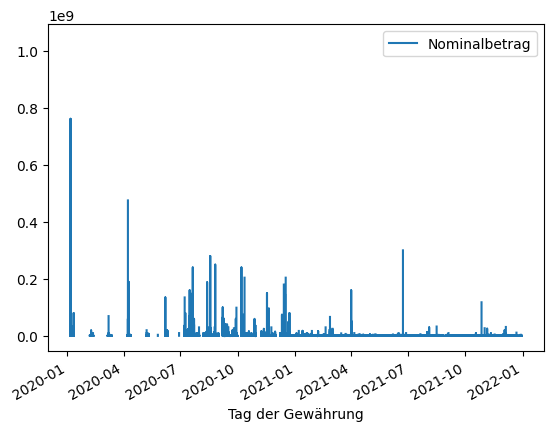

In [104]:
frame.plot(x="Tag der Gewährung", y=["Nominalbetrag"])

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/388587206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame["Beihilfeelement, in voller Höhe"] = frame["Beihilfeelement, in voller Höhe"].apply(float)


<Axes: xlabel='Tag der Gewährung'>

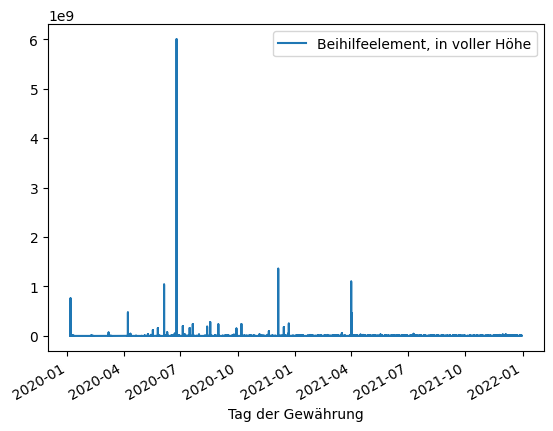

In [102]:

frame.plot(x="Tag der Gewährung", y=["Beihilfeelement, in voller Höhe"])

In [95]:
frame["Tag der Gewährung"] = pd.to_datetime(frame["Tag der Gewährung"], format='%y%m%d')

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_35276/1441397045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame["Tag der Gewährung"] = pd.to_datetime(frame["Tag der Gewährung"], format='%y%m%d')


<Axes: xlabel='Tag der Gewährung'>

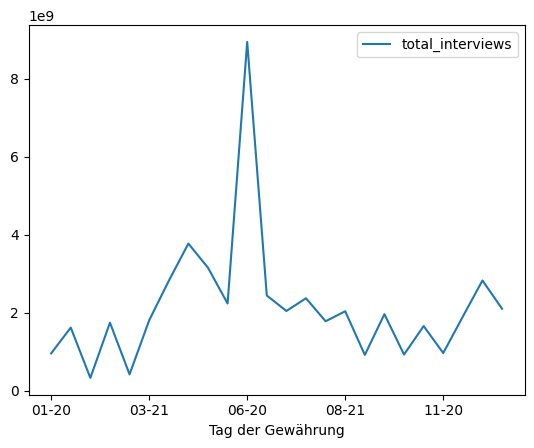

In [106]:
frame.groupby(frame["Tag der Gewährung"].dt.strftime('%m-%y')).agg (total_interviews = ("Beihilfeelement, in voller Höhe" , 'sum')).plot()

In [88]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/main/all_companies.csv', index=False, header=True)